<a href="https://colab.research.google.com/github/Raju-24-25/Model-Building-Handsons/blob/main/Built_a_Logistic_Regression_classification_model_on_32K%2B_U_S_Census_records_to_predict_whether_an_individual_earns_above_or_below_%2450K_annually%2C_extracting_key_socioeconomic_insights_for_data_driven_decision_making_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement -
Census-income data plays the most important role in the democratic system of government, highly affecting the economic sectors. Census-related figures are used to allocate federal funding by the government to different states and localities.

Census data is also used for post census residents estimates and predictions, economic and social science research, and many other such applications. Therefore, the importance of this data and its accurate predictions is very clear to us. The main aim is to increase awareness about how the income factor actually has an impact not only on the individual lives of citizens but also an effect on the nation and its betterment. You will have a look at the data pulled out from the 1994 Census bureau database, and try to find insights into how various features have an effect on the income of an individual.

The data contains approximately 32,000 observations with over 15 variables.

The strategy is to analyze the data and perform a predictive task of classification to predict whether an individual makes over 50K a year or less by using a logistic regression algorithm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
census_data = pd.read_csv('/content/census-income .csv')

In [3]:
census_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


* Column Names	   &     Description

      Age              	Age of the individual

      Workclass       	department of the working individual

      fnlwgt	          Final weight of the individual

      education	        The education degree of the individual

      education-num	    Number of years of education

      marital-status	  Marital status of the individual

      occupation	      Occupation of the individual

      relationship	    Relation value

      race	            Ethnicity of the individual

      sex	              Female, Male

      capital-gain	    capital gain of the individual

      capital-loss	    capital loss of the individual

      hours-per-week	  number of working hours

      native-country	  The native country of the individual

      Annual-Income	    Annual income either >50K or <=50K


In [4]:
census_data.shape

(32561, 15)

In [5]:
census_data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [6]:
census_data.duplicated().sum()

np.int64(24)

In [7]:
census_data.drop_duplicates(inplace=True)

In [8]:
census_data.duplicated().sum()

np.int64(0)

In [9]:
census_data.shape

(32537, 15)

In [10]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  32537 non-null  object
 14  annual_income   32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [11]:
census_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Summary Statistics ( For Numerical Columns )

    1. age :

       Count - 32537 entries, indicates that this column has no missing values.
       Mean - 38.58 years, suggesting that the average age of individuals in the dataset is around 38 years.
       Standard Deviation - 13.63 years, indicating moderate to high variability in the age of individuls.
       Minimum - 17 years, showing that the youngest individual is 17 years old.
       Maxmum - 90 years, with the oldest individual being 90 years old.
       25th Percentile (Q1) - 28 years, which is the lower quartile where 25% of the individuals are younger than this age.
       50th Percentile (Median) - 37 years, indicating that half of the individuals are younger than 37 years.
       75th Percentile (Q3) - 48 years, suggesting that 75% of individuals are younger than 48 years.

     2. fnlwgt :

       Count - 32537 entries, indicates that this column has no missing values.
       Mean - 189780, suggesting that the average fnlwgt of individuals in the dataset is around 189780.
       Standard Deviation - 105556, indicating high variability in the fnlwgt.
       Minimum - 12285, showing that the lowest fnlwgt is 12285.
       Maxmum - 1484705, showing the highest fnlwgt is 1484705.
       25th Percentile (Q1) - 117827.
       50th Percentile (Median) - 178356.
       75th Percentile (Q3) - 236993.

      3. education-num :

       Count - 32537 entries, indicates that this column has no missing values.
       Mean - 10.08 years, suggesting that the average age of education of the individuals is around 10 years.
       Standard Deviation - 2.57 years, indicating moderate to high variability in the age of education of the individuals.
       Minimum - 1 year, showing that the minimum age of education of the individuals is at least 1 year.
       Maxmum - 16 years, showing that the maximum age of education of the indvidual is 16 years.
       25th Percentile (Q1) - 9 years, which is the lower quartile where 25% of the individuals having age of education of 9 years are younger than this age.
       50th Percentile (Median) - 10 years, indicating that half of the individuals having age of education of 10 years.
       75th Percentile (Q3) - 12 years, suggesting that 75% of individuals having age of education of 12 years.

      4. capital-gain :

       Count - 32537 entries, indicates that this column has no missing values.
       Mean - 1078.44, showing that the average of this column is around 1078.
       Standard Deviation - 7387.95, indicating extremely high variability in this column.
       Minimum - 0000
       Maxmum - 99999, showing that the maximum capital gain of one individual is 99999.
       25th Percentile (Q1) - 0000
       50th Percentile (Median) - 0000
       75th Percentile (Q3) - 0000

      5. capital-loss :

       Count - 32537 entries, indicates that this column has no missing values.
       Mean - 87.36, showing that the average of this column is around 87.
       Standard Deviation - 403.10, indicating extremely high variability in this column.
       Minimum - 0000
       Maxmum - 4356, showing maximum capital loss of one is 4356.
       25th Percentile (Q1) - 0000
       50th Percentile (Median) - 0000
       75th Percentile (Q3) - 0000

      6. hours-per-week :

       Count - 32537 entries, indicates that this column has no missing values.
       Mean - 40.44 hrs, showing that the average working hours for individual is around 40 hrs.
       Standard Deviation - 12.34 hrs, indicating high variability for working hrs for the individuals.
       Minimum - 1 hrs, showing that the minimum working hours of one individual is 1 hrs.
       Maxmum - 99 hrs, showing that the maximum working hours of one individual is 99 hrs.
       25th Percentile (Q1) - 40 hrs, which is the lower quartile where 25% of the individuals have lower working hours than this.
       50th Percentile (Median) - 40 hrs, indicating that half of the individuals having hours per week / working hours of 40 hrs.
       75th Percentile (Q3) - 45 hrs, suggesting that 75% of individuals having hours per week / working hours of 99 hrs.

# Here In The Dataset As We can See The Target Variable i.e Annual Income Column Have The Wrong Data Type. Let's Fix -

In [12]:
census_data['annual_income'] = census_data['annual_income'].map({
    '<=50K': 0,
    '>50K': 1
})

In [13]:
census_data['annual_income'].value_counts()

,count
annual_income,
0,24698
1,7839


# Dropping Some Un-necessary Columns

In [14]:
drop_cols = ['fnlwgt', 'education', 'native-country', 'race']
census_data.drop(columns=drop_cols, inplace=True)

# Feature Engineering

Encoding

In [15]:
col_list = []
for col in census_data.columns:
  if ((census_data[col].dtype == 'object') & (col != 'annual_income')):
    col_list.append(col)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in col_list:
  census_data[col] = le.fit_transform(census_data[col])

In [16]:
census_data.head()

,age,workclass,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,annual_income
0,39,7,13,4,1,1,1,2174,0,40,0
1,50,6,13,2,4,0,1,0,0,13,0
2,38,4,9,0,6,1,1,0,0,40,0
3,53,4,7,2,6,0,1,0,0,40,0
4,28,4,13,2,10,5,0,0,0,40,0


# Split Features & Target

In [17]:
X = census_data.drop(columns='annual_income', axis=1)
y = census_data['annual_income']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Feature Scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

# Evaluation

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8276582667486171
[[5825  350]
 [1052  908]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      6175
           1       0.72      0.46      0.56      1960

    accuracy                           0.83      8135
   macro avg       0.78      0.70      0.73      8135
weighted avg       0.82      0.83      0.81      8135



# ROC-AUC or Probability Evaluation

In [22]:
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]
print("ROC AUC:", roc_auc_score(y_test, y_prob))

ROC AUC: 0.8546401305461456


# 1. Confusion Matrix Heatmap

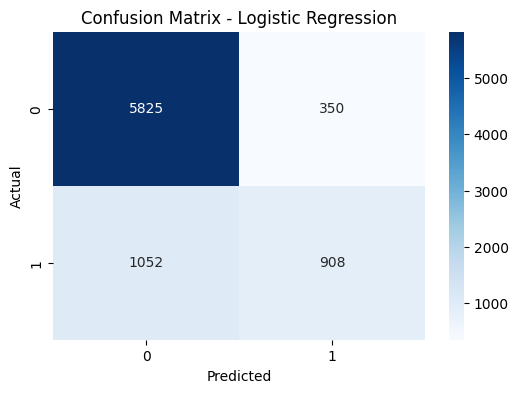

In [23]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# ROC Curve

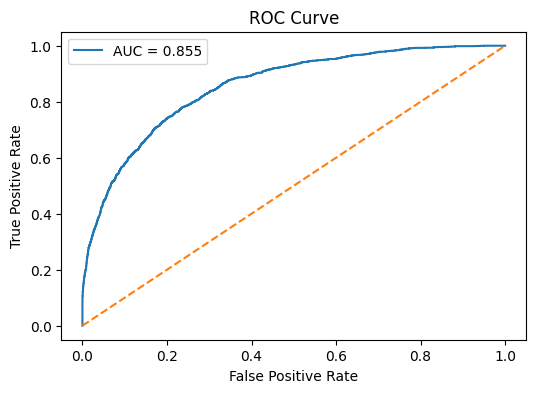

In [24]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature Importance Plot

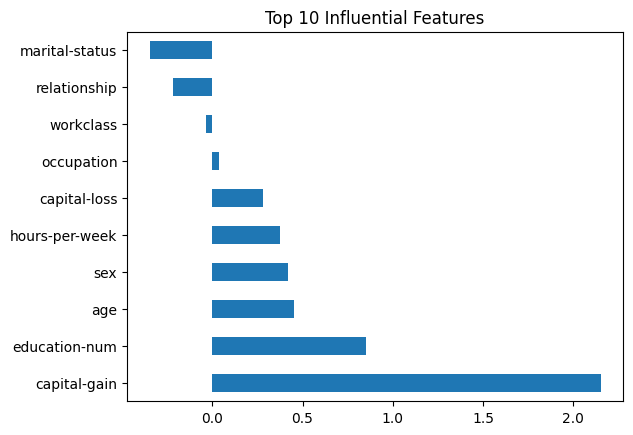

In [25]:
importance = pd.Series(model.coef_[0], index=X.columns)
importance = importance.sort_values(ascending=False).head(10)

importance.plot(kind='barh', title="Top 10 Influential Features")
plt.show()